In [23]:
import numpy as np
from globalConstants import *
import dynamiqs as dq
import jax
import jax.numpy as jnp # the JAX version of numpy
from matplotlib import pyplot
# from 
t_save = t_save
alpha = np.sqrt(-eps/(g2.conjugate()))
# alpha
# Ia = dq.eye(na)
# Ib = dq.eye(nb)
# a_tensored = a
# adag_tensored = dq.dag(a)
# b_tensored = b
# bdag_tensored = dq.dag(b)


# I = dq.tensor(dq.eye(nb),dq.eye(na))
# psi0a = dq.coherent(na, 0)  # vacuum state for mode a
# psi0b = dq.coherent(nb, 0)  # vacuum state for mode b
# psi0 = dq.tensor(psi0a, psi0b)
# tsave = jnp.linspace(0,T,numTimes)
# psi0.shape

Hbuff = g2 * dq.dag(a) @ dq.dag(a) @ b  + jnp.conj(g2) * a @ a @ dq.dag(b) + jnp.conj(eps) * b + eps * dq.dag(b)
jump_ops = [jnp.sqrt(Kb)*b] # jump operators
exp_ops = [dq.dag(a) @ a] # expectation operators
res = dq.mesolve(Hbuff,jump_ops, psi0, t_save, exp_ops=exp_ops) # solve the master equation
# resimulating 1.1

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|██████████| 100.0% ◆ elapsed 369.95ms ◆ remaining 0.00ms  


### Analysis of 1.2
We observed that by changing the $k_B$ over time, that the local minimum of the function wouldn't change. However, the curve seemed to be more strongly damped in the sense that returning to a fidelity of one took longer.
![heyo.gif](attachment:heyo.gif)

In [24]:
rho_a_list = [state for state in res.states]
def fidelity(kappaB,t_save):
    kappaB = 10
    kappa2 = 4*abs(g2)**2/kappaB

    jumpOperator = [jnp.sqrt(kappa2) * (a_tensored @ a_tensored - alpha**2*dq.tensor(dq.eye(na), dq.eye(nb)))]
    # D = dq.tensor(D_memory,Ib)
    # jump_ops = [jnp.sqrt(kappa2)*()]
    # For example, extract the underlying dense representation (if accessible)
    # and re-wrap it with the proper dims.
    Hzero = dq.tensor(dq.zeros(na), Ib)
    

    onePointTwo = dq.mesolve(Hzero,jumpOperator,psi0,t_save)
    # We only need a zero hamiltonian because we're not coupled to the outside
    # anymore
    onePointTwoList = [state for state in onePointTwo.states]
    fidelities = []
    for rho_full, rho_eff in zip(rho_a_list, onePointTwoList):
        fid = dq.fidelity(rho_full, rho_eff)
        fidelities.append(fid)
    fidelities = jnp.array(fidelities)
    return fidelities

In [25]:
fidelities=fidelity(10,t_save)

/Users/amer_/Documents/Obsidian Vault/Personal/Project Notes/Hackathon/iQuHack/lib/python3.12/site-packages/dynamiqs/qarrays/qarray.py:484: UserWarning: A sparse qarray has been converted to dense layout due to element-wise addition with a dense qarray.
  return self + (-y)
|██████████| 100.0% ◆ elapsed 498.82ms ◆ remaining 0.00ms  


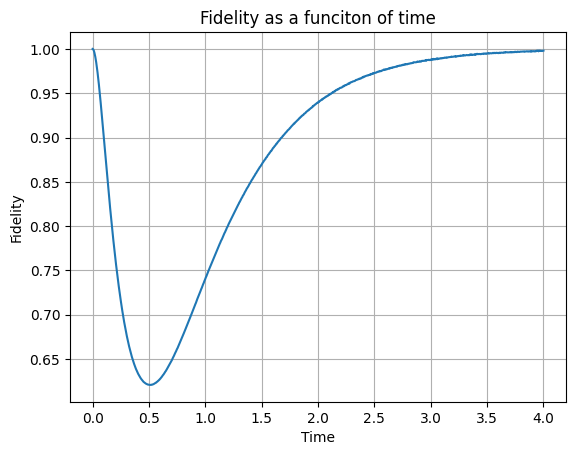

In [26]:
plt.plot(t_save,fidelities)
plt.ylabel("Fidelity")
plt.xlabel("Time")
plt.title("Fidelity as a funciton of time")
plt.grid()

/Users/amer_/Documents/Obsidian Vault/Personal/Project Notes/Hackathon/iQuHack/lib/python3.12/site-packages/dynamiqs/qarrays/qarray.py:484: UserWarning: A sparse qarray has been converted to dense layout due to element-wise addition with a dense qarray.
  return self + (-y)
|██████████| 100.0% ◆ elapsed 549.44ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 583.11ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 506.65ms ◆ remaining 0.00ms  


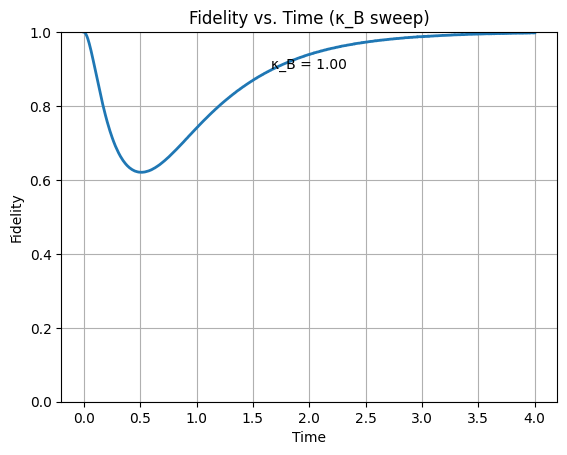

/Users/amer_/Documents/Obsidian Vault/Personal/Project Notes/Hackathon/iQuHack/lib/python3.12/site-packages/dynamiqs/qarrays/qarray.py:484: UserWarning: A sparse qarray has been converted to dense layout due to element-wise addition with a dense qarray.
  return self + (-y)
|██████████| 100.0% ◆ elapsed 491.66ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 503.88ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 486.58ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 485.11ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 584.54ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 659.80ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 567.14ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 528.96ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 508.48ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 516.53ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 531.83ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 522.43ms ◆ remaining 0.00ms  
|████

In [27]:
from matplotlib.animation import FuncAnimation

# Set up parameters for κ_B sweep
kappaB_values = jnp.arange(1, 10.5, 0.5)

# Set up figure for animation
fig, ax = plt.subplots()
initial_fid = fidelity(10,t_save)
line, = ax.plot(t_save, initial_fid, lw=2)
title_text = ax.text(0.5, 0.9, "", transform=ax.transAxes, ha="center")
ax.set_xlabel("Time")
ax.set_ylabel("Fidelity") 
ax.set_title("Fidelity vs. Time (κ_B sweep)")
ax.grid(True)
ax.set_ylim(0, 1)

def update(frame):
    """Update function for animation."""
    current_kB = kappaB_values[frame]
    fid_arr = fidelity(current_kB,t_save)
    line.set_ydata(fid_arr)
    title_text.set_text(f"κ_B = {current_kB:.2f}")
    return line, title_text

# Create animation
anim = FuncAnimation(fig, update, frames=len(kappaB_values), interval=200, blit=True)
plt.show()

# Save animation
anim.save("heyo.gif", fps=8)

|██████████| 100.0% ◆ elapsed 733.17ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 671.06ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 514.73ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 544.29ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 501.19ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 552.03ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 496.71ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 499.16ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 502.42ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 518.75ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 492.97ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 589.44ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 530.39ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 483.17ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 841.67ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 639.41ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 531.37ms ◆

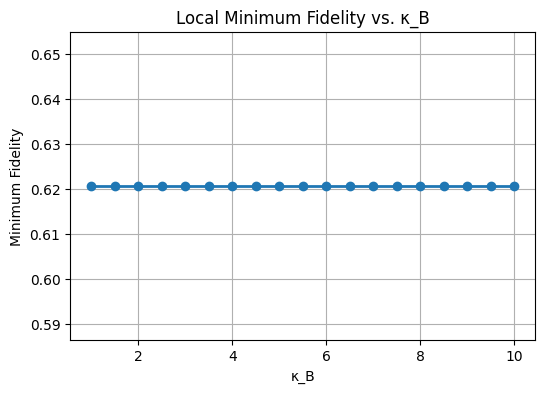

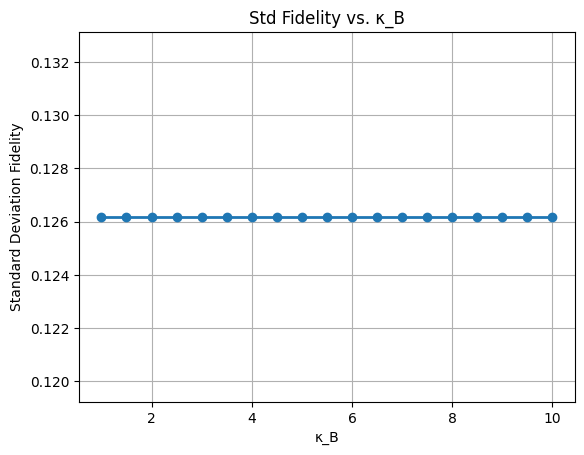

In [28]:
# Calculate minimum fidelities and standard deviations
min_fidelities = []
std_fidelities = []
for kB in kappaB_values:
    fid_curve = fidelity(kB,t_save)
    min_fidelities.append(jnp.min(fid_curve))
    std_fidelities.append(jnp.std(fid_curve))
min_fidelities = jnp.array(min_fidelities)

# Plot the minimum fidelity vs κ_B
plt.figure(figsize=(6,4))
plt.plot(kappaB_values, min_fidelities, 'o-', lw=2)
plt.xlabel("κ_B")
plt.ylabel("Minimum Fidelity")
plt.title("Local Minimum Fidelity vs. κ_B")
plt.grid(True)
plt.show()

# Plot standard deviation of fidelity vs κ_B
plt.figure()
plt.plot(kappaB_values, std_fidelities, 'o-', lw=2)
plt.xlabel("κ_B")
plt.ylabel("Standard Deviation Fidelity")
plt.title("Std Fidelity vs. κ_B")
plt.grid(True)
plt.show()

Looks like a leanord jones potential. It starts at the exact same state, then quickly falls to zero. Then somehow we slowly correct back to one

https://www.dynamiqs.org/stable/documentation/getting_started/sharp-bits.html
https://www.dynamiqs.org/stable/python_api/solver/Expm.html
https://www.dynamiqs.org/stable/python_api/utils/general/fidelity.html#dynamiqs.utils.general.fidelity
https://www.dynamiqs.org/stable/python_api/utils/operators/displace.html#dynamiqs.utils.operators.displace
https://www.dynamiqs.org/stable/documentation/advanced_examples/kerr-oscillator.html
